In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('./data/insurance.csv')

In [3]:
data.sample(6)

age     sex    bmi  children smoker     region     charges
1171   43  female  26.70         2    yes  southwest  22478.6000
86     57  female  31.16         0    yes  northwest  43578.9394
596    42  female  29.48         2     no  southeast   7640.3092
1284   61    male  36.30         1    yes  southwest  47403.8800
173    35  female  34.80         1     no  southwest   5246.0470
1112   48  female  25.85         3    yes  southeast  24180.9335

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


*Numerical Variables*
- Age
- BMI
- Charges
  
*Categorical Variables*
- sex
- children
- smoker
- region

In [5]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [6]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Exploratory Data Analysis

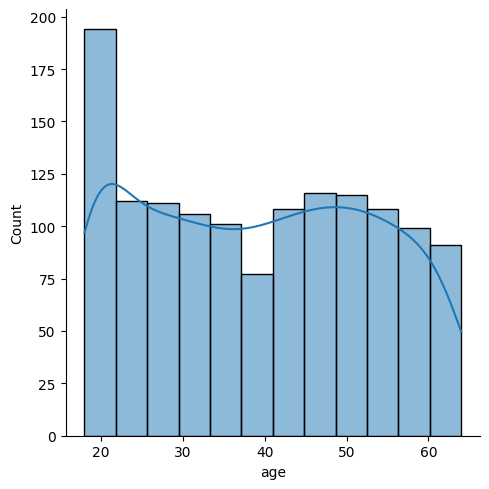

In [7]:
sns.displot(data,x='age',kde=True)

We must look to tranform this column so as to give a better linear model.

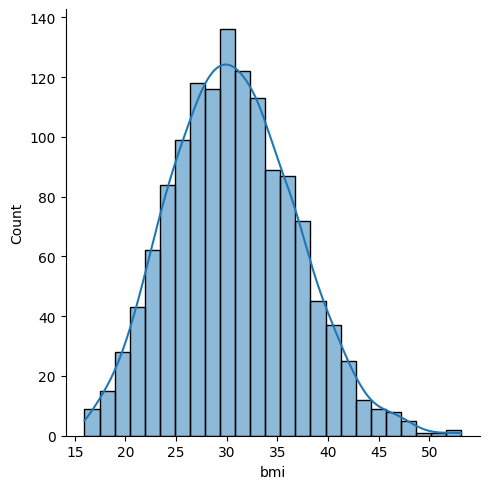

In [8]:
sns.displot(data,x='bmi',kde=True)

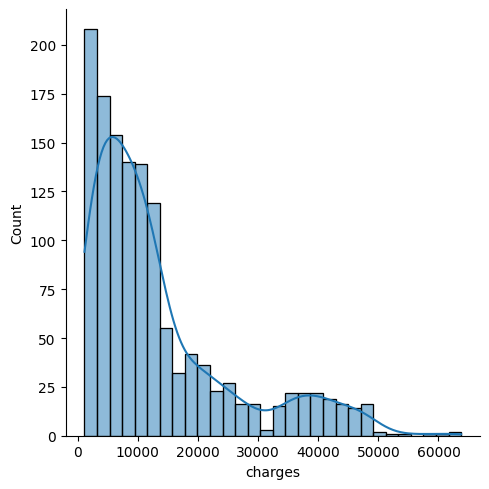

In [9]:
sns.displot(data,x='charges',kde=True)

In [10]:
data

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

<Axes: xlabel='smoker', ylabel='count'>

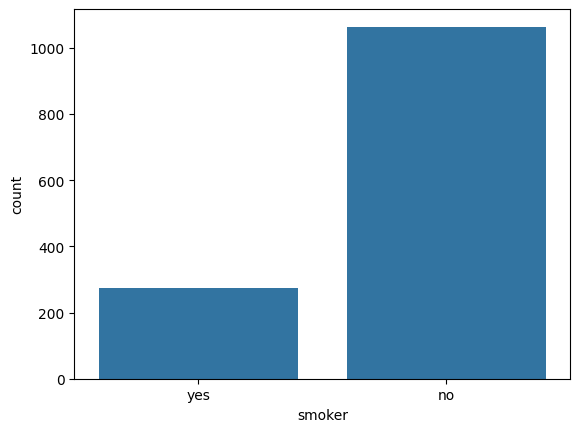

In [11]:
sns.countplot(data,x='smoker')

We need to transform this `charges` to make it more linear

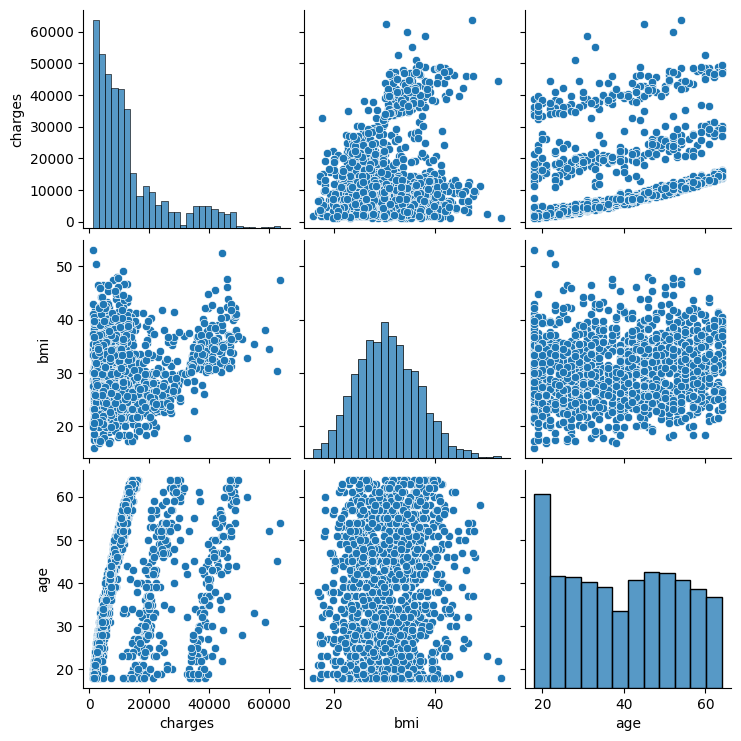

In [12]:
sns.pairplot(data,vars=['charges','bmi','age'])

<Axes: >

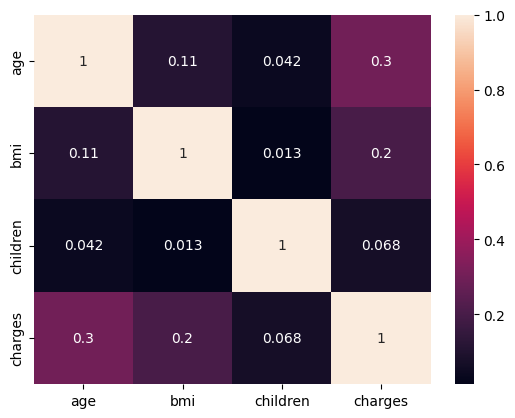

In [13]:
sns.heatmap(data.corr(numeric_only=True),annot=True)

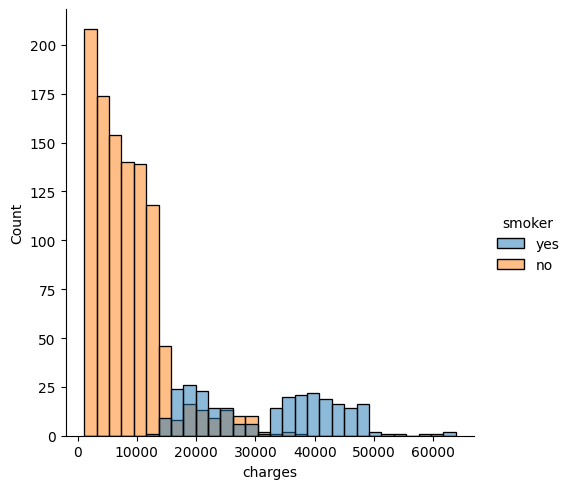

In [14]:
sns.displot(data,x='charges',hue='smoker')

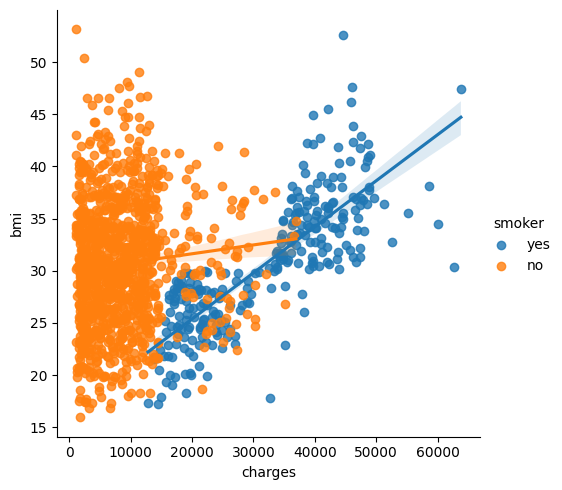

In [15]:
sns.lmplot(data,x='charges',y='bmi',hue='smoker')

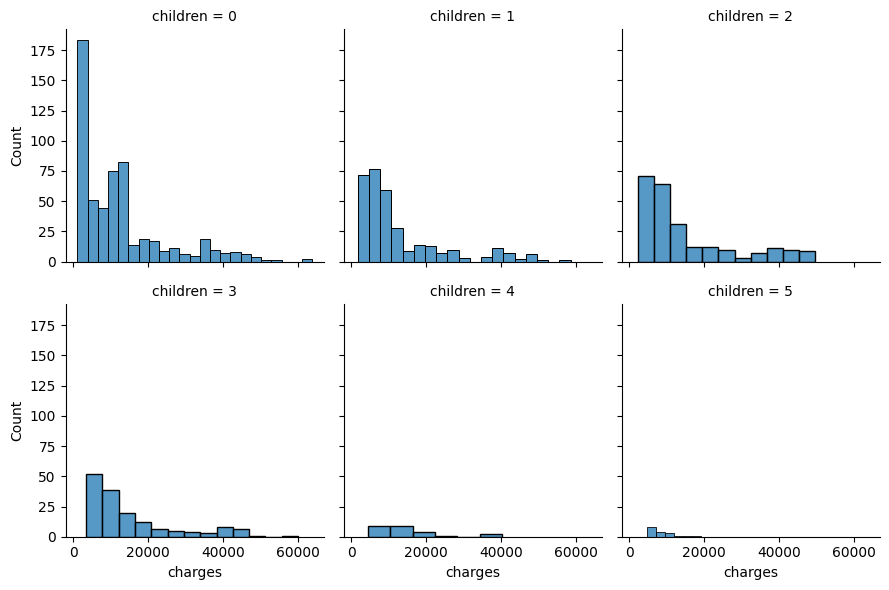

In [16]:
f = sns.FacetGrid(data,col='children',col_wrap=3)
f.map_dataframe(sns.histplot, x="charges")

In [17]:
data = data.join(pd.get_dummies(data[['sex','region','smoker']],drop_first=True))
data.drop(['sex','region','smoker'],axis=1,inplace=True)

In [18]:
data.sample(6)

age     bmi  children      charges  sex_male  region_northwest  \
649    58  32.965         0  12430.95335     False             False   
270    18  29.370         1   1719.43630      True             False   
1222   50  25.300         0   8442.66700      True             False   
514    39  28.300         1  21082.16000      True             False   
230    42  36.195         1   7443.64305     False              True   
686    42  26.125         2   7729.64575      True             False   

      region_southeast  region_southwest  smoker_yes  
649              False             False       False  
270               True             False       False  
1222              True             False       False  
514              False              True        True  
230              False             False       False  
686              False             False       False

<Axes: >

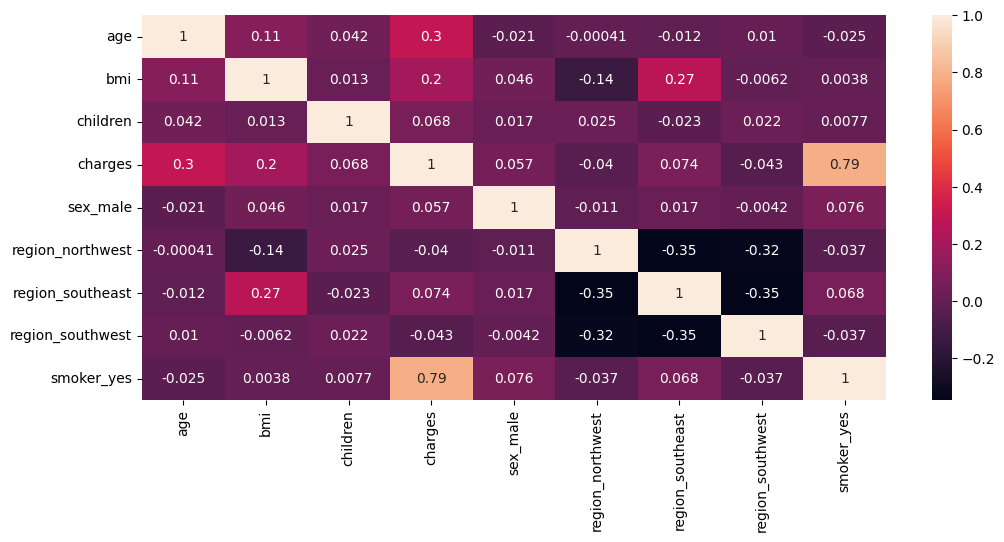

In [19]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)

In [33]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.compose import ColumnTransformer


ct = ColumnTransformer(
    [('transfrom',PowerTransformer(method='box-cox'),[0,3])]  ,
    remainder='passthrough'
)

data_t = ct.fit_transform(data)

In [34]:
pi = 3.1415

<Axes: xlabel='age', ylabel='Count'>

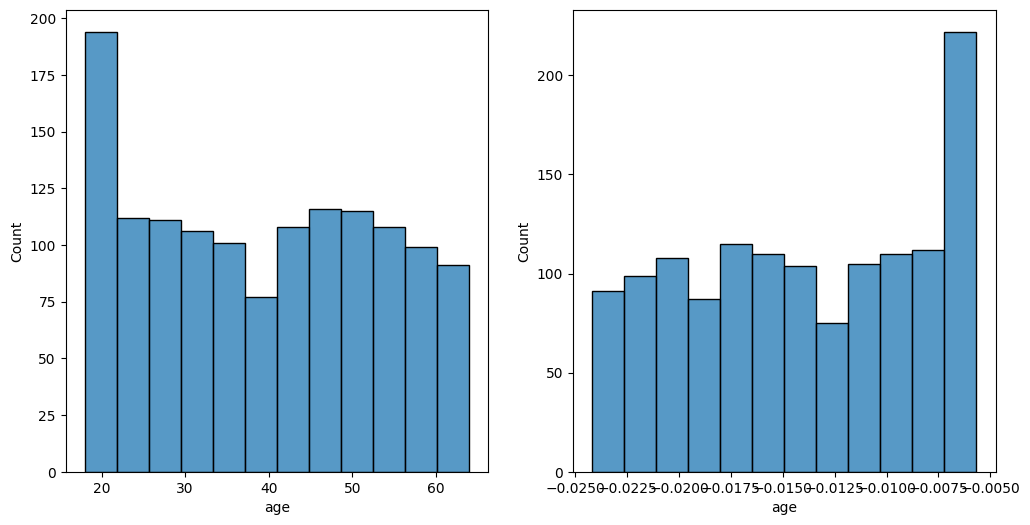

In [35]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(data['age'],ax=axes[0])
sns.histplot(np.sqrt(np.log(data['age']))*np.sin(2*pi*data['age']),ax=axes[1])

In [36]:
data_n = pd.DataFrame(data_t,columns=(list(data.columns[[0,3]]) + [col for col in data.columns if col not in data.columns[[0,3]]]))

<Axes: xlabel='age', ylabel='Density'>

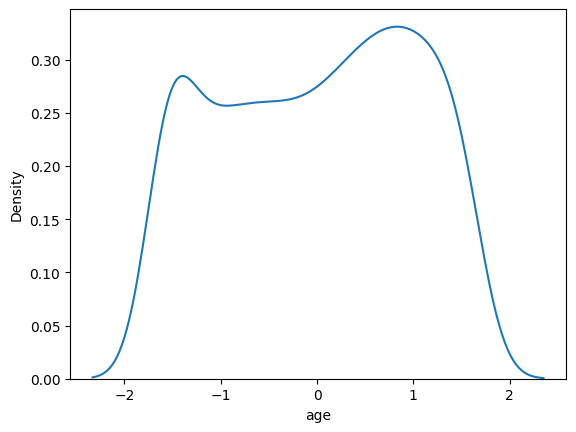

In [37]:
sns.kdeplot(data_n,x='age')

<Axes: xlabel='charges', ylabel='Density'>

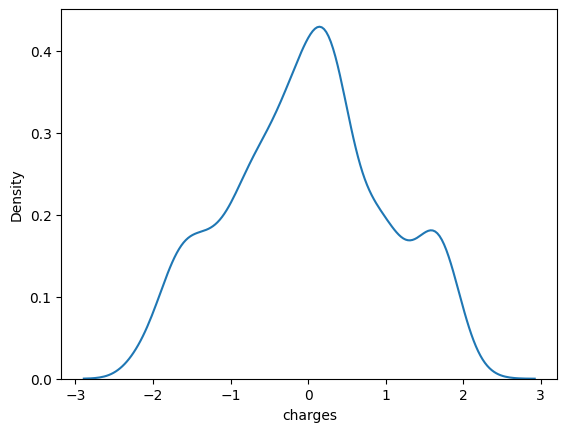

In [38]:
sns.kdeplot(data_n,x='charges')

In [50]:
ct = ColumnTransformer(
    [('scale',StandardScaler(copy=False),[2])],
    remainder = 'passthrough'
)

d = ct.fit_transform(data_n)

In [51]:
df = pd.DataFrame(d,columns = [data_n.columns[2]] + [col for col in data_n.columns if col not in data_n.columns[2]])

In [52]:
df['Age*sm'] = df['age'] * df['smoker_yes']
df['bmi*sm'] = df['bmi'] * df['smoker_yes']

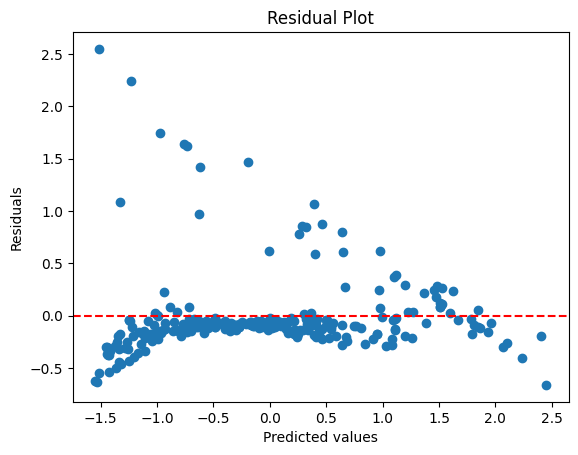

R²: 0.8559
Adjusted R²: 0.8503


In [53]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = df[[col for col in df.columns if col not in df.columns[2]]]  
y = df['charges'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared and adjusted R-squared
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Plot residuals
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

# Print adjusted R²
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")


In [54]:
print(pd.DataFrame({
    'Variables' : model.feature_names_in_,
    'Coefficients' : model.coef_
}))

          Variables  Coefficients
0               bmi      0.009890
1               age      0.621578
2          children      0.098430
3          sex_male     -0.088590
4  region_northwest     -0.071813
5  region_southeast     -0.136014
6  region_southwest     -0.165409
7        smoker_yes      1.686489
8            Age*sm     -0.496419
9            bmi*sm      0.369102


In [144]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, r2_score




X = df[[col for col in df.columns if col not in df.columns[[2,10]]]]  
y = df['charges']

model = LinearRegression()


kf = KFold(n_splits=5, shuffle=True, random_state=42)


cv_results = cross_val_score(model, X, y, cv=kf, scoring=make_scorer(r2_score))

# Display the R² score for each fold and the mean R² score
print("R² scores for each fold:", cv_results)
print("Mean R² score:", cv_results.mean())


R² scores for each fold: [0.83986184 0.77227384 0.83730286 0.75503913 0.80827749]
Mean R² score: 0.8025510311776911


In [56]:
df['age*bmi'] = df['age'] * df['bmi']

In [57]:
df

bmi       age   charges children sex_male region_northwest  \
0     -0.45332 -1.526649  0.681644        0    False            False   
1     0.509621 -1.619368 -1.748873        1     True            False   
2     0.383307 -0.761699 -0.768781        3     True            False   
3    -1.305531 -0.377504  0.978814        0     True             True   
4    -0.292556 -0.452483  -0.91656        0     True             True   
...        ...       ...       ...      ...      ...              ...   
1333  0.050297  0.789252  0.165744        3     True             True   
1334  0.206139 -1.619368 -1.498607        0    False            False   
1335  1.014878 -1.619368 -1.806638        0    False            False   
1336 -0.797813  -1.34655 -1.594762        0    False            False   
1337 -0.261388  1.463973   1.29995        0    False             True   

     region_southeast region_southwest smoker_yes    Age*sm    bmi*sm  \
0               False             True       True -1.526649  -0.45332   
1                True            False      False      -0.0       0.0   
2                True            False      False      -0.0       0.0   
3               False            False      False      -0.0      -0.0   
4               False            False      False      -0.0      -0.0   
...               ...              ...        ...       ...       ...   
1333            False            False      False       0.0       0.0   
1334            False            False      False      -0.0       0.0   
1335             True            False      False      -0.0       0.0   
1336            False             True      False      -0.0      -0.0   
1337            False            False       True  1.463973 -0.261388   

       age*bmi  
0      0.69206  
1    -0.825264  
2    -0.291964  
3     0.492843  
4     0.132377  
...        ...  
1333  0.039697  
1334 -0.333815  
1335 -1.643461  
1336  1.074296  
1337 -0.382665  

[1338 rows x 12 columns]

In [65]:
import statsmodels.api as sm

X = df[[col for col in df.columns if col not in df.columns[[2,10]]]]  
y = df['charges']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_t2 = sm.add_constant(X_train)

In [59]:
model = sm.OLS(y_train.astype(float), X_t2.astype(float)).fit()


In [60]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     418.1
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        18:12:40   Log-Likelihood:                -653.40
No. Observations:                1070   AIC:                             1329.
Df Residuals:                    1059   BIC:                             1384.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3293      0.034  

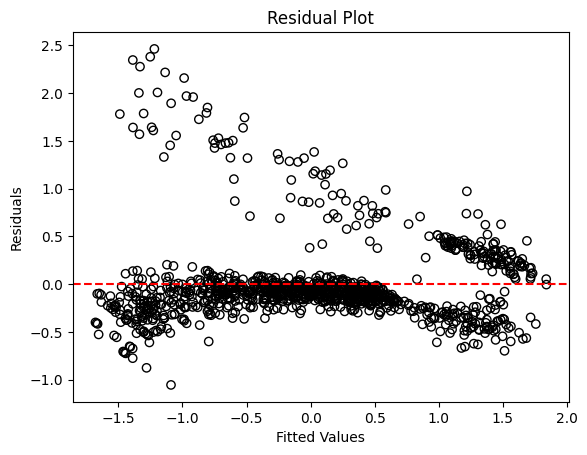

In [61]:
fitted_values = model.fittedvalues  
residuals = model.resid  

plt.scatter(fitted_values, residuals, edgecolors='k', facecolors='none')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [68]:
Xt = X_t2.astype(float).to_numpy()

In [78]:
(n,p) = Xt.shape

In [70]:
hat_matrix = Xt.dot(np.linalg.inv(Xt.T.dot(Xt)).dot(Xt.T))
lev = np.diagonal(hat_matrix)

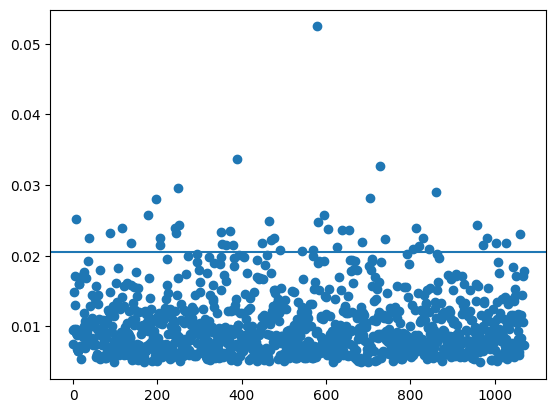

In [79]:
plt.plot(lev,'o')
plt.axhline(2*p/n)

In [86]:
X_train['leverage'] = (lev <= (2*p/n))

In [93]:
from statsmodels.stats.outliers_influence import OLSInfluence

res_diag = OLSInfluence(model).summary_frame() 

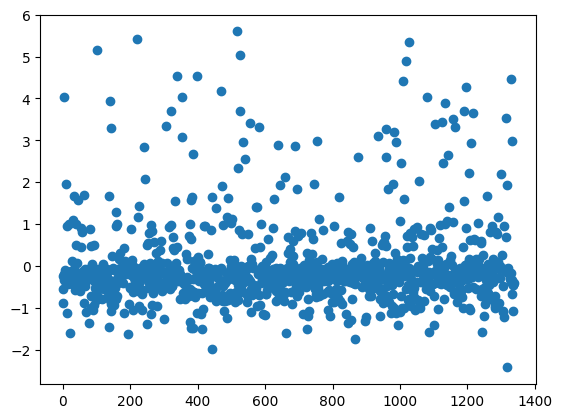

In [97]:
plt.plot(res_diag['student_resid'],'o')

In [120]:
cooks_d = res_diag['cooks_d']

In [121]:
# Using cutoff of 1
X_train['Cooks Distance'] = (cooks_d <= (4/n))

In [122]:
X_train['y'] = y_train

In [123]:
# Truncating the influential points
X_in = X_train[(X_train['leverage'] == True) | (X_train['Cooks Distance'] == True)]
X2 = X_in.drop(['leverage','Cooks Distance','y'],axis=1)

In [140]:
y2 = X_in.y

In [141]:
X2 = sm.add_constant(X2)

model2 = sm.OLS(y2.astype(float),X2.astype(float)).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     418.2
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:17:43   Log-Likelihood:                -644.57
No. Observations:                1065   AIC:                             1311.
Df Residuals:                    1054   BIC:                             1366.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3283      0.034  

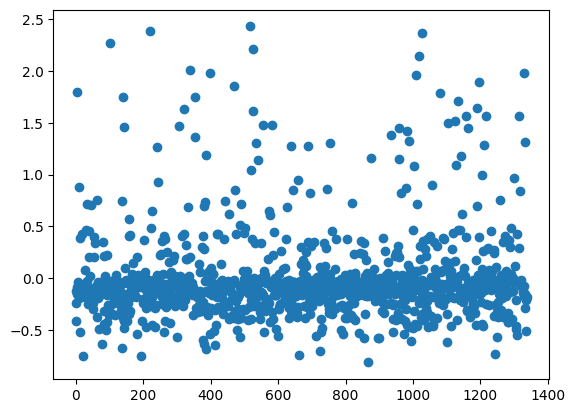

In [150]:
plt.plot(model2.resid,'o')

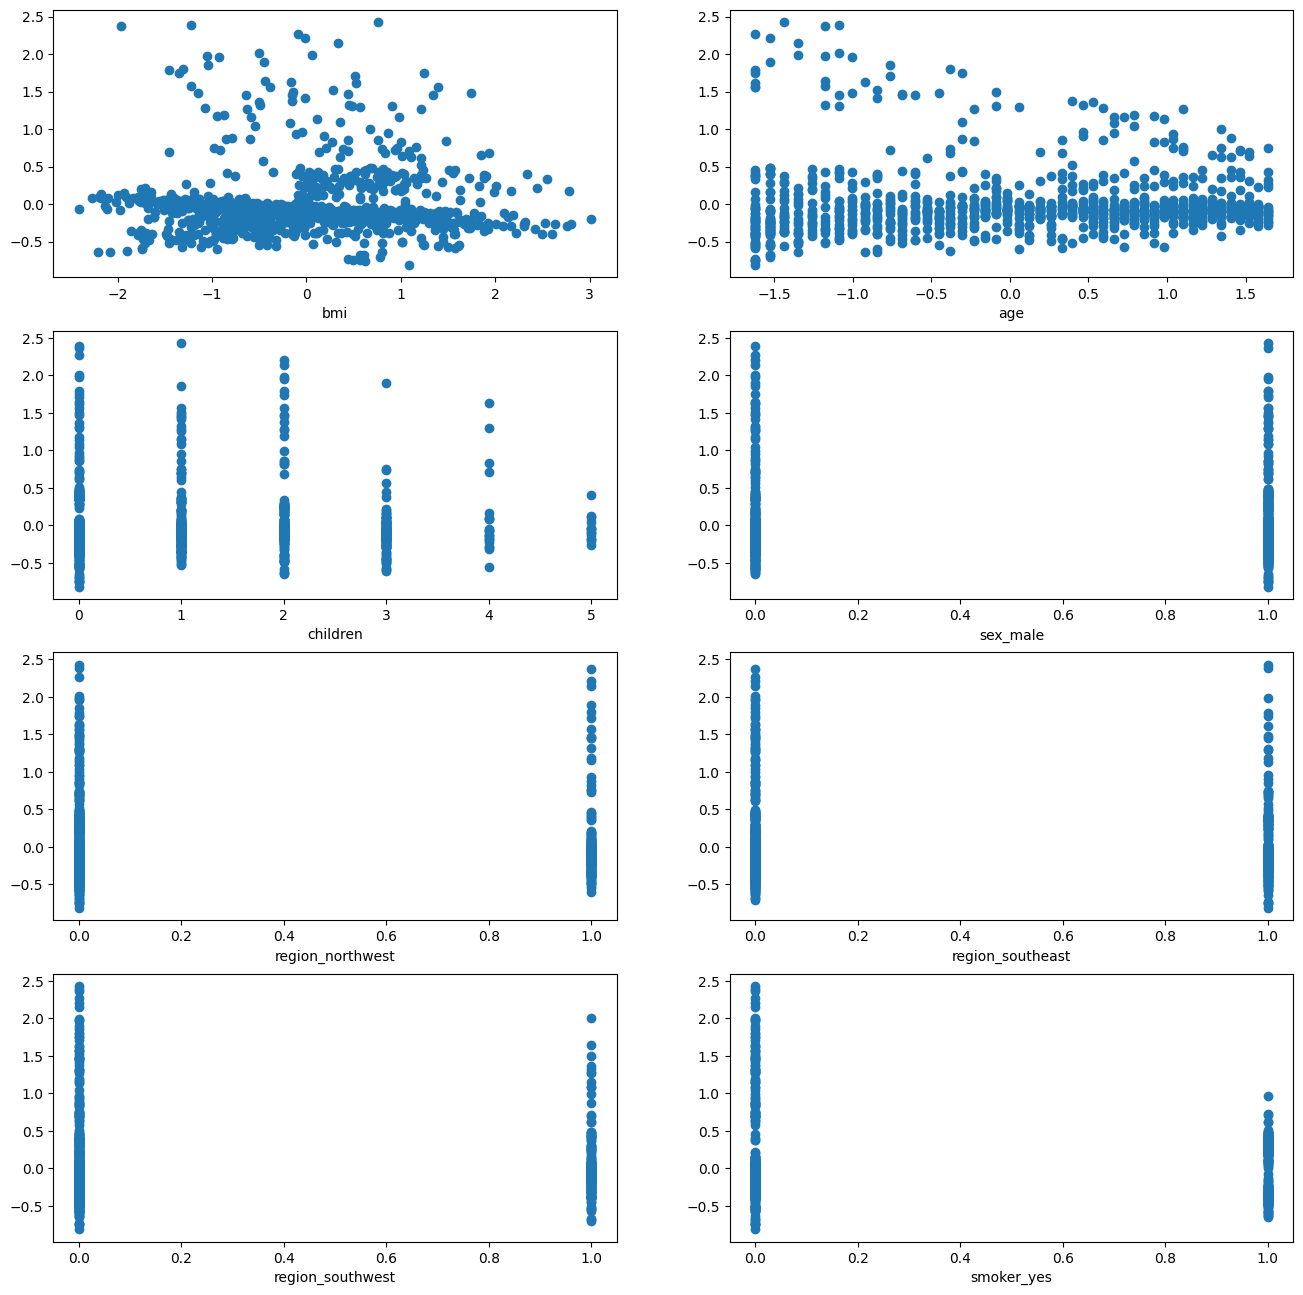

In [173]:
plt.figure(figsize=(16,16))
for i in range(8):
    plt.subplot(4,2,i+1)
    plt.plot(X2.iloc[:,i+1],model2.resid,'o')
    plt.xlabel(X2.columns[i+1])
plt.show()

In [179]:
# Exploring a linear relationship between bmi and the residual
res = sm.OLS(model2.resid.astype(float),X2.bmi.astype(float)).fit()
print(res.summary())

# No such relationship has been found.

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                              0.000
Date:                Thu, 17 Oct 2024   Prob (F-statistic):                        1.00
Time:                        19:38:18   Log-Likelihood:                         -644.57
No. Observations:                1065   AIC:                                      1291.
Df Residuals:                    1064   BIC:                                      1296.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [194]:
res = sm.OLS(model2.resid.astype(float),sm.add_constant(1/(X2.age)).astype(float)).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004600
Date:                Thu, 17 Oct 2024   Prob (F-statistic):              0.946
Time:                        19:43:54   Log-Likelihood:                -644.57
No. Observations:                1065   AIC:                             1293.
Df Residuals:                    1063   BIC:                             1303.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.847e-05      0.014      0.007      0.9

In [198]:
X_test = sm.add_constant(X_test)
y_pred = model2.predict(X_test)

In [199]:
r2_score(y_test,y_pred)

0.7783748418086068

In [200]:
weights = 1 / (residuals**2)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_t2 = sm.add_constant(X_train)

In [202]:
wls_model = sm.WLS(y_train.astype(float), X_t2.astype(float),weights=weights).fit()

In [203]:
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.948
Model:                            WLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     1940.
Date:                Thu, 17 Oct 2024   Prob (F-statistic):               0.00
Time:                        19:47:43   Log-Likelihood:                -1877.0
No. Observations:                1070   AIC:                             3776.
Df Residuals:                    1059   BIC:                             3831.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7632      0.023  

In [204]:
resid = wls_model.resid

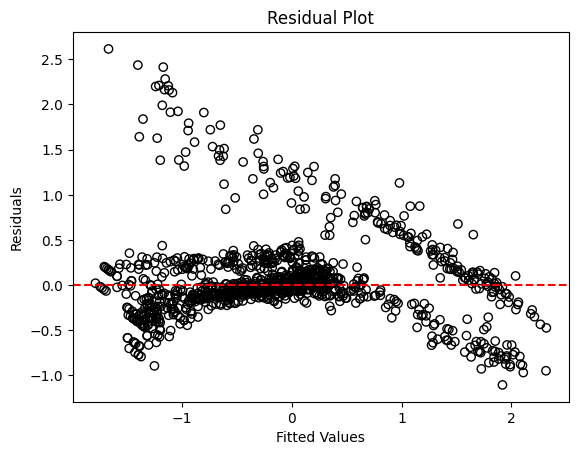

In [205]:
fitted_values = wls_model.fittedvalues  
residuals = wls_model.resid  

plt.scatter(fitted_values, residuals, edgecolors='k', facecolors='none')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [206]:
from sklearn.metrics import r2_score

score = r2_score(y_test,wls_model.predict(sm.add_constant(X_test)))

In [207]:
score

0.6984779374046728

### Interpretation:

Let's break down the key results from your linear regression output and interpret each section:

### 1. **Model Fit:**
   - **R-squared (0.820)**: The model explains 82% of the variance in the dependent variable (`charges`). This suggests a strong model fit.
   - **Adjusted R-squared (0.819)**: After adjusting for the number of predictors, the model still explains 81.9% of the variance, indicating that the added predictors and interaction terms are valuable without overfitting.
   - **F-statistic (484.0) and Prob (F-statistic: 0.00)**: The overall model is statistically significant (p-value < 0.05), meaning at least one predictor has a significant relationship with the target (`charges`).

### 2. **Coefficients:**
Each coefficient represents the expected change in the `charges` variable for a one-unit increase in the corresponding predictor, holding all other variables constant.

- **Intercept (`const`: -0.3146)**: When all predictors are zero, the model predicts that `charges` would be -0.31, but this value is not very interpretable on its own.
  
- **BMI (`bmi`: 0.0099, p = 0.517)**: BMI has a small positive relationship with charges, but the coefficient is not statistically significant (p-value > 0.05). This means BMI alone is not a significant predictor of medical charges in this model.

- **Age (`age`: 0.6216, p = 0.000)**: For every one-year increase in age, `charges` increase by 0.6216 units, and this effect is highly significant.

- **Children (`children`: 0.0984, p = 0.000)**: Each additional child increases the expected charges by 0.0984 units, and this is statistically significant.

- **Sex (`sex_male`: -0.0886, p = 0.001)**: Being male reduces expected charges by 0.0886 units compared to females, and this is statistically significant.

- **Regions**:
   - **Region_northwest (`-0.0718`, p = 0.052)**: Living in the northwest has a small negative effect on charges, but it is **marginally significant**.
   - **Region_southeast (`-0.1360`, p = 0.000)**: Living in the southeast significantly reduces charges.
   - **Region_southwest (`-0.1654`, p = 0.000)**: Similarly, living in the southwest also significantly reduces charges.
   
- **Smoker (`smoker_yes`: 1.6865, p = 0.000)**: Being a smoker drastically increases charges by 1.6865 units, which is highly significant. Smoking seems to be one of the largest determinants of medical charges.

### 3. **Interaction Terms**:
   - **Age * Smoker (`Age*sm`: -0.4964, p = 0.000)**: This interaction suggests that the effect of age on charges is **reduced for smokers**. While age normally increases charges, for smokers, the charges increase at a slower rate with age.
   
   - **BMI * Smoker (`bmi*sm`: 0.3691, p = 0.000)**: This interaction indicates that higher BMI has a **more positive effect on charges for smokers** than for non-smokers. The combination of smoking and a higher BMI leads to even higher medical charges.

### 4. **Model Diagnostics:**
   - **Omnibus and Jarque-Bera tests**: Both tests for normality of residuals have p-values of 0.000, indicating that the residuals are **not normally distributed**. This could suggest potential model issues or that certain assumptions of linear regression (like normality of residuals) are violated.
   
   - **Skewness (3.040) and Kurtosis (13.362)**: The high skew and kurtosis values suggest that the distribution of residuals is far from normal, with long tails and possible outliers.

   - **Durbin-Watson (2.108)**: This value close to 2 indicates that there is **no strong autocorrelation** in the residuals, meaning the errors are independent.

### Conclusion:
- The model seems to fit the data well with an R-squared of 0.820 and adjusted R-squared of 0.819.
- Age, number of children, sex, smoking status, and regions (southeast and southwest) are significant predictors of medical charges.
- The interaction between age and smoking status indicates that the effect of age on charges is moderated by whether a person smokes, while higher BMI amplifies the impact of smoking on charges.
- However, some diagnostic statistics suggest potential non-normality in the residuals, which might require further investigation or a more complex model to address these issues.
